## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

## Brief Look at the df

In [2]:
df=  pd.read_csv('loan.csv')
df.head()

C:\Users\vssashar\AppData\Local\Temp\ipykernel_23488\3038495523.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=  pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# Data Cleaning

## Removing null columns

Many of the columns seem to have only NA values, and hence wouldn't be of use to us. Let us drop them

In [5]:
df = df.dropna(axis = 1, how = 'all')

In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [8]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

## Removing constant columns
Some columns seem to show 0 standard deviation, which means they don't show any variation, and hence no pattern for us. We need to drop them, too.

In [9]:
df[['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens']].dropna().describe()

,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39018.0,39018.0,39018.0,39018.0,39018.0,39018.000000,39018.0
mean,0.0,1.0,0.0,0.0,0.0,0.043211,0.0
std,0.0,0.0,0.0,0.0,0.0,0.204214,0.0
min,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [10]:
df = df.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens'],axis=1)

In [11]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

## Columns with little data
Columns such as next_pymnt_d, mths_since_last_record seem to have very few non null rows. Since it is only small fraction of the whole data, we can drop it

In [12]:
df = df.drop(['next_pymnt_d','mths_since_last_record'],axis=1)

## Non-numeric columns with no unique data

In [13]:
df_num = df.select_dtypes(exclude=[np.number])

In [14]:
for col in df_num:
    print(col)
    print(df_num[col].unique())
    print('\n\n')

term
[' 36 months' ' 60 months']



int_rate
['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' '15.28%' '15.

So we see the following columns have no unique data: 
1. application_type
2. initial_list_status
3. pymnt_plan

Thus we can remove these columns

In [15]:
df = df.drop(['application_type','initial_list_status','pymnt_plan'],axis=1)

We also see that in home_ownership, we have both OTHER and NONE as an option. Let us look at the distribution

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

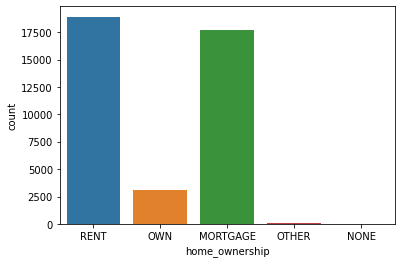

In [16]:
sns.countplot(x="home_ownership", data=df)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

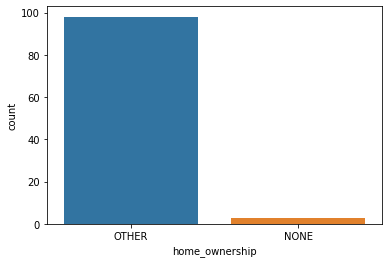

In [17]:
sns.countplot(x="home_ownership", data=df[(df.home_ownership=='OTHER') | (df.home_ownership=='NONE') ])

We can simply push all the NONE into OTHER category to reduce categories

In [18]:
df.loc[df.home_ownership == 'NONE', 'home_ownership'] = 'OTHER'

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

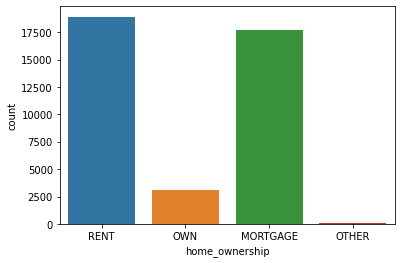

In [19]:
sns.countplot(x="home_ownership", data=df)

## Removing descriptive columns
columns such as url and desc are of no use to us. Even emp_title and title has just too many different values to create meaningful groupings. We can remove them too.

In [20]:
len(df.emp_title.unique())

28821

In [21]:
len(df.title.unique())

19616

In [22]:
df = df.drop(['id','member_id','url','desc','zip_code','emp_title','title'],axis=1)

## Converting some non-num columns to numeric
int_rate and revol_util need to be converted to numeric

emp_length:
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
 
 We can convert emp_length to numeric too: 
 1. <1 year -> 0
 2. 10+ years -> 10
 3. n years -> n

In [23]:
df.int_rate = df.int_rate.apply(lambda x: float(x[:-1]))

In [24]:
df.revol_util = df.revol_util.apply(lambda x: float(x[:-1]) if isinstance(x, str) else x)

In [25]:
def emp_len_aux(x):
    if isinstance(x, str):
        if x == '< 1 year' :
            return 0
        elif x == '10+ years':
            return 10
        else:
            return int(x[0])
    return x    
df.emp_length = df.emp_length.apply(emp_len_aux)

In [26]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  float64
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  float64
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

In [27]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16


## Convert date strings to dates


In [28]:
dt_fn = (lambda x : '01-'+x[:4]+'20'+x[-2:] if isinstance(x, str) else x)

In [29]:
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d.apply(dt_fn))

In [30]:
df.issue_d= pd.to_datetime(df.issue_d.apply(dt_fn))

In [31]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line.apply(dt_fn))

In [32]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d.apply(dt_fn))

In [33]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1.0,RENT,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01


In [34]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  int64         
 1   funded_amnt              39717 non-null  int64         
 2   funded_amnt_inv          39717 non-null  float64       
 3   term                     39717 non-null  object        
 4   int_rate                 39717 non-null  float64       
 5   installment              39717 non-null  float64       
 6   grade                    39717 non-null  object        
 7   sub_grade                39717 non-null  object        
 8   emp_length               38642 non-null  float64       
 9   home_ownership           39717 non-null  object        
 10  annual_inc               39717 non-null  float64       
 11  verification_status      39717 non-null  object        
 12  issue_d                  39717 n

## Removing columns based on business understanding
We have now brought down the number of columns to 37, helping us look in detail at each of them with relative ease.

Since we are only concerned with parameters available before approving the loan,
we can eliminate all columns related to repayment and current delinquencies, which come into picture after loan approval:
1. last_pymnt_d
2. last_pymnt_amnt 
3. last_credit_pull_d 
4. total_rec_late_fee
5. total_rec_int
6. delinq_2yrs
7. total_acc
8. total_pymnt
9. total_pymnt_inv
10. total_rec_prncp
11. total_rec_int
12. total_rec_late_fee 
13. out_prncp
14. out_prncp_inv
15. recoveries
16. mths_since_last_delinq
17. revol_bal


In [35]:
df = df.drop(['last_pymnt_d','last_pymnt_amnt',
             'last_credit_pull_d','total_rec_late_fee',
             'total_rec_int','delinq_2yrs','total_acc',
             'total_pymnt','total_pymnt_inv','total_rec_prncp',
            'total_rec_int','total_rec_late_fee','out_prncp',
            'out_prncp_inv','recoveries','mths_since_last_delinq','revol_bal','earliest_cr_line'],axis=1)

In [36]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  int64         
 1   funded_amnt              39717 non-null  int64         
 2   funded_amnt_inv          39717 non-null  float64       
 3   term                     39717 non-null  object        
 4   int_rate                 39717 non-null  float64       
 5   installment              39717 non-null  float64       
 6   grade                    39717 non-null  object        
 7   sub_grade                39717 non-null  object        
 8   emp_length               38642 non-null  float64       
 9   home_ownership           39717 non-null  object        
 10  annual_inc               39717 non-null  float64       
 11  verification_status      39717 non-null  object        
 12  issue_d                  39717 n

In [37]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,collection_recovery_fee
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,38642.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,4.973449,6.896893e+04,13.315130,0.869200,9.294408,0.055065,48.832152,12.406112
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,3.562580,6.379377e+04,6.678594,1.070219,4.400282,0.237200,28.332634,148.671593
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,2.000000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,25.400000,0.000000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,4.000000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,49.300000,0.000000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,9.000000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,72.400000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,7002.190000


### After extensive clearing of columns, we now have 22 columns of data. Let us subsequently clean rows, too

## Cleaning rows

Except for revol_util and emp_length, none of the columns have any null values. Even these 2 columns have only few null values. We will simply drop all these null rows, which just seem like an exceptional minority, and look at the general big picture.

In [38]:
df.dropna(inplace=True)

In [39]:
df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38595 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38595 non-null  int64         
 1   funded_amnt              38595 non-null  int64         
 2   funded_amnt_inv          38595 non-null  float64       
 3   term                     38595 non-null  object        
 4   int_rate                 38595 non-null  float64       
 5   installment              38595 non-null  float64       
 6   grade                    38595 non-null  object        
 7   sub_grade                38595 non-null  object        
 8   emp_length               38595 non-null  float64       
 9   home_ownership           38595 non-null  object        
 10  annual_inc               38595 non-null  float64       
 11  verification_status      38595 non-null  object        
 12  issue_d                  38595 n

## Outlier removal
Let's look at the boxplots of those numerical columns which have exceptionally high max values as spotted from the df.describe()

<AxesSubplot:>

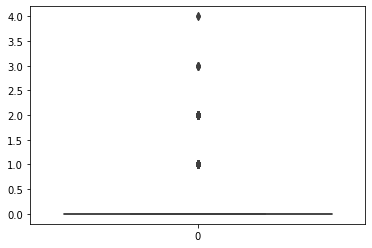

In [40]:
sns.boxplot(df.pub_rec)

<AxesSubplot:>

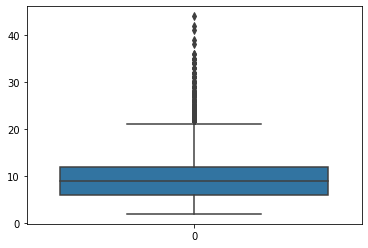

In [41]:
sns.boxplot(df.open_acc)

<AxesSubplot:>

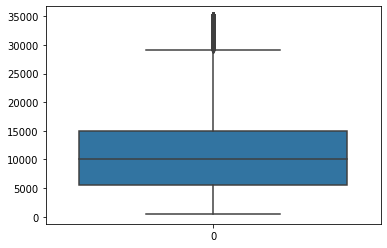

In [42]:
sns.boxplot(df.loan_amnt)

<AxesSubplot:>

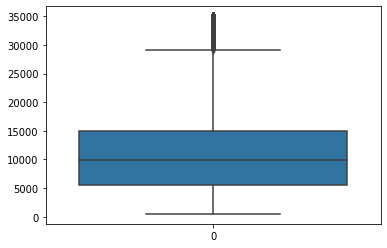

In [43]:
sns.boxplot(df.funded_amnt)

<AxesSubplot:>

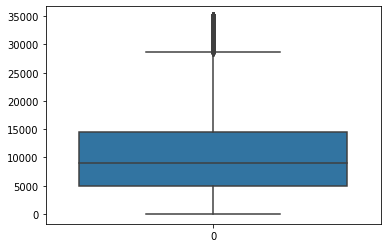

In [44]:
sns.boxplot(df.funded_amnt_inv)

<AxesSubplot:>

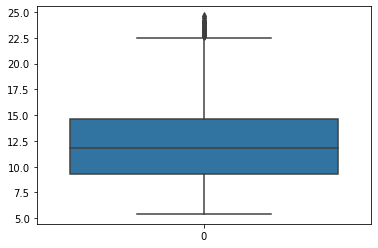

In [45]:
sns.boxplot(df.int_rate)

<AxesSubplot:>

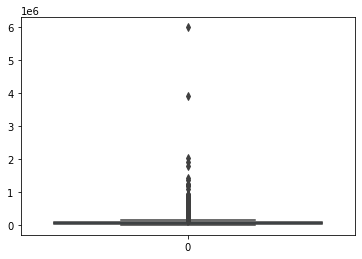

In [46]:
sns.boxplot(df.annual_inc)

<AxesSubplot:>

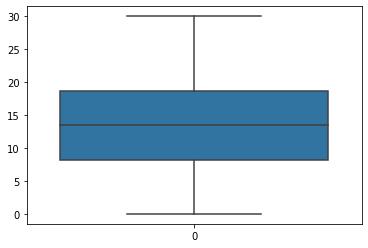

In [47]:
sns.boxplot(df.dti)

<AxesSubplot:>

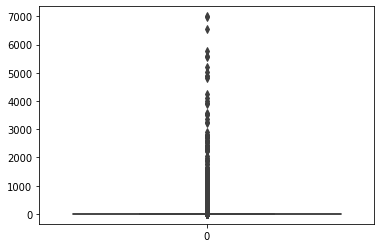

In [48]:
sns.boxplot(df.collection_recovery_fee)

<AxesSubplot:>

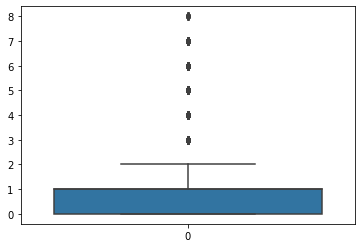

In [49]:
sns.boxplot(df.inq_last_6mths)

<AxesSubplot:>

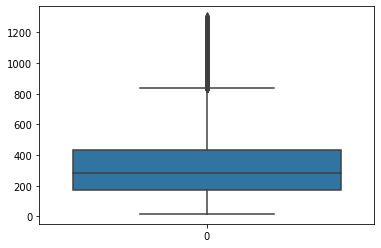

In [50]:
sns.boxplot(df.installment)

As we can see, we have a lot of outliers in collection_recovery_fee and annual_inc.

Let us clear out the outliers in annual_inc, pub_rec, collection_recovery_fee.(retain under 95 percentile)

In [51]:
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

In [52]:
df = df[df.collection_recovery_fee <= df.collection_recovery_fee.quantile(0.95)]

In [53]:
df = df[df.pub_rec <= df.pub_rec.quantile(0.95)]

In [54]:
df = df[df.inq_last_6mths <= df.inq_last_6mths.quantile(0.95)]

In [55]:
df = df[df.open_acc <= df.open_acc.quantile(0.95)]

In [56]:
df = df[df.installment <= df.installment.quantile(0.95)]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31085 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                31085 non-null  int64         
 1   funded_amnt              31085 non-null  int64         
 2   funded_amnt_inv          31085 non-null  float64       
 3   term                     31085 non-null  object        
 4   int_rate                 31085 non-null  float64       
 5   installment              31085 non-null  float64       
 6   grade                    31085 non-null  object        
 7   sub_grade                31085 non-null  object        
 8   emp_length               31085 non-null  float64       
 9   home_ownership           31085 non-null  object        
 10  annual_inc               31085 non-null  float64       
 11  verification_status      31085 non-null  object        
 12  issue_d                  31085 n

In [58]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,collection_recovery_fee
count,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000,31085.000000
mean,9704.021232,9446.811163,8990.600395,11.689795,280.105332,4.817661,59483.686620,13.286417,0.793437,8.589255,0.052308,48.958145,0.121549
std,5892.339602,5535.061553,5532.893745,3.551496,155.519405,3.524262,27035.011018,6.669294,0.951917,3.545618,0.222651,28.263189,0.606044
min,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4000.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5000.000000,5000.000000,4875.000000,8.900000,158.270000,2.000000,40000.000000,8.130000,0.000000,6.000000,0.000000,25.700000,0.000000
50%,8500.000000,8400.000000,8000.000000,11.490000,256.070000,4.000000,55000.000000,13.370000,0.000000,8.000000,0.000000,49.500000,0.000000
75%,13000.000000,12700.000000,12000.000000,13.990000,377.690000,8.000000,75000.000000,18.560000,1.000000,11.000000,0.000000,72.300000,0.000000
max,35000.000000,31000.000000,30750.000000,23.910000,694.590000,10.000000,144000.000000,29.990000,3.000000,17.000000,1.000000,99.900000,5.043600


<AxesSubplot:>

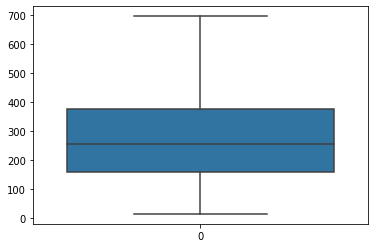

In [59]:
sns.boxplot(df.installment)

<AxesSubplot:>

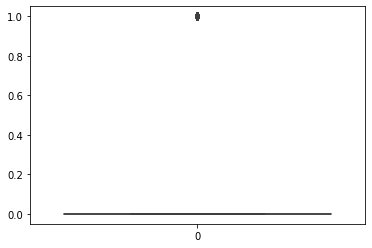

In [60]:
sns.boxplot(df.pub_rec)

<AxesSubplot:>

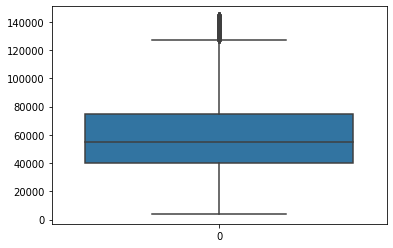

In [61]:
sns.boxplot(df.annual_inc)

<AxesSubplot:>

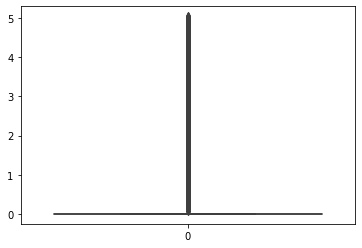

In [62]:
sns.boxplot(df.collection_recovery_fee)

<AxesSubplot:>

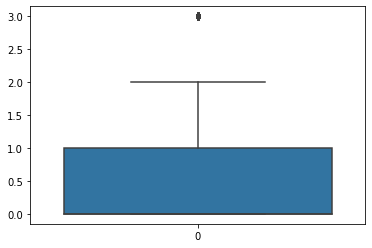

In [63]:
sns.boxplot(df.inq_last_6mths)

We observe that even after clearing into the 95 percentile zone, collection_recovery_fee still seems to have too many outliers. Seems like recovery fee for virtually all records is just 0. Since we are now only looking at $.0 to $.5 of recovery fee, we can pretty much ignore this column altogether. So let's drop this column too

In [64]:
df = df.drop(['collection_recovery_fee'],axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31085 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            31085 non-null  int64         
 1   funded_amnt          31085 non-null  int64         
 2   funded_amnt_inv      31085 non-null  float64       
 3   term                 31085 non-null  object        
 4   int_rate             31085 non-null  float64       
 5   installment          31085 non-null  float64       
 6   grade                31085 non-null  object        
 7   sub_grade            31085 non-null  object        
 8   emp_length           31085 non-null  float64       
 9   home_ownership       31085 non-null  object        
 10  annual_inc           31085 non-null  float64       
 11  verification_status  31085 non-null  object        
 12  issue_d              31085 non-null  datetime64[ns]
 13  loan_status          31085 non-

#### We must note that we are now trying to understand the influence of different factors on loan_status.
Let us look at that column

In [66]:
df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off'], dtype=object)

We know that 
- Fully Paid means the lending was a success
- Charged off means lending was a failure
- Current would mean we don't yet know if the lending is aa success or a failure i.e. ambiguous as of now

This means we need to analyse Fully Paid and Charged Off, i.e. the data with unambiguos outcomes. So let's analyse only those rows with 'Fully Paid' and 'Charged Off'


In [67]:
df_current = df[df.loan_status=='Current']

In [68]:
df = df[df.loan_status!='Current']

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30213 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            30213 non-null  int64         
 1   funded_amnt          30213 non-null  int64         
 2   funded_amnt_inv      30213 non-null  float64       
 3   term                 30213 non-null  object        
 4   int_rate             30213 non-null  float64       
 5   installment          30213 non-null  float64       
 6   grade                30213 non-null  object        
 7   sub_grade            30213 non-null  object        
 8   emp_length           30213 non-null  float64       
 9   home_ownership       30213 non-null  object        
 10  annual_inc           30213 non-null  float64       
 11  verification_status  30213 non-null  object        
 12  issue_d              30213 non-null  datetime64[ns]
 13  loan_status          30213 non-

# UNIVARIATE DATA ANALYSIS
We now have 21 columns to analyse.
Let us classify the columns into
1. Numerical
2. Ordered categorical
3. Unordered categorical
4. Dates

### Numerical
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. int_rate
5. installment
6. annual_inc
7. dti
8. inq_last_6mths
9. open_acc
10. pub_rec
11. revol_util


### Order Categorical
1. term
2. grade
3. sub_grade
4. emp_length



### Unordered Categorical
1. home_ownership
2. purpose
3. addr_state
4. loan_status
5. verification_status
### Dates
1. issue_d 


## Unordered Categorical


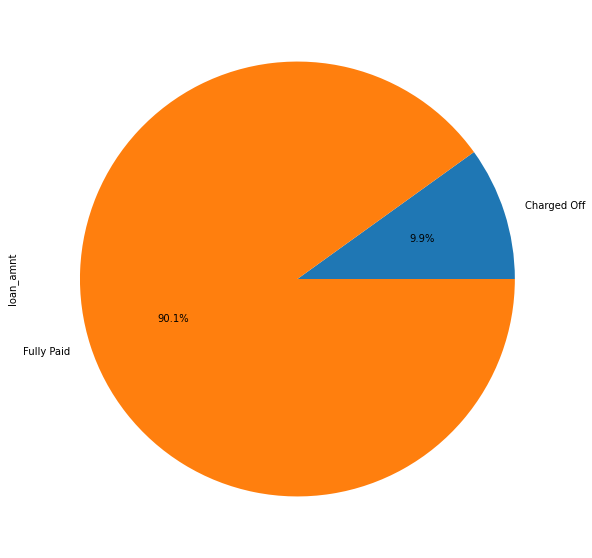

In [70]:
# Let's start with our most important column: loan_status
df.groupby(by='loan_status').count().plot(kind='pie', y='loan_amnt',figsize=(10,10),autopct='%1.1f%%',legend=False);

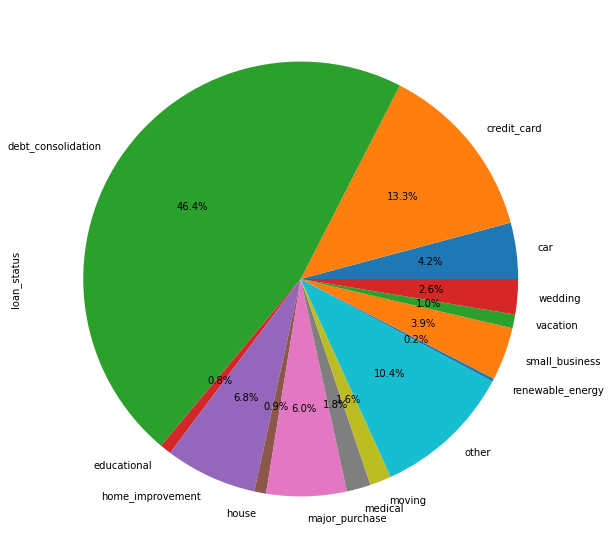

In [71]:
df.groupby(by='purpose').count().plot(kind='pie', y='loan_status',figsize=(10,10),autopct='%1.1f%%',legend=False);

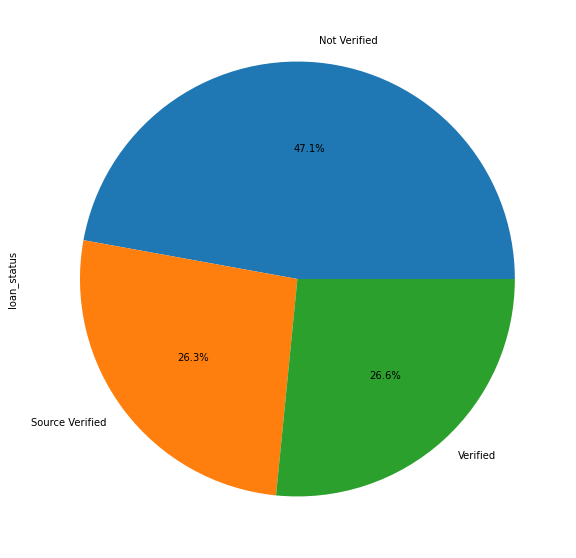

In [72]:
df.groupby(by='verification_status').count().plot(kind='pie', y='loan_status',figsize=(10,10),autopct='%1.1f%%',legend=False);

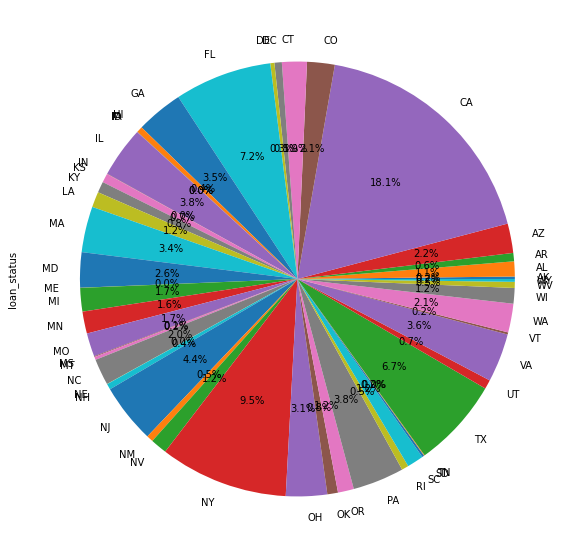

In [73]:
df.groupby(by='addr_state').count().plot(kind='pie', y='loan_status',figsize=(10,10),autopct='%1.1f%%',legend=False);

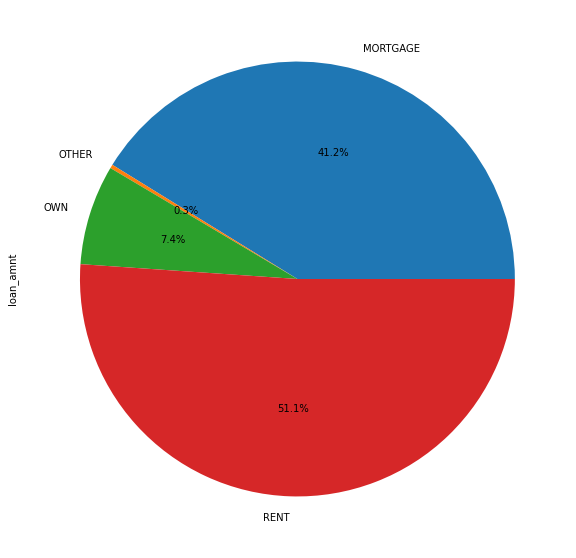

In [74]:
df.groupby(by='home_ownership').count().plot(kind='pie', y='loan_amnt',figsize=(10,10),autopct='%1.1f%%',legend=False);

### Conclusions
1. Looks like most of the lendings were successful
2. Major purpose for applying for loan is debt_consolidation (almost 50%)
3. Second major purpose is for credit_card
4. Less than 1% of lendees have an education loan or renewable energy loan
4. Most income sources have not been verified by LC
5. CA has been the most active state where loans were give (about 18%)
6. About half the lendees rent and alomst another half have mortgaed their homes. 
7. People with unmortgaged homes (7.5%) are least likely to apply for a loan

## Order Categorical

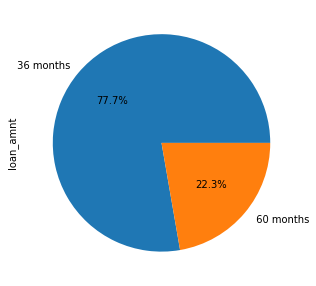

In [75]:
df.groupby(by='term').count().plot(kind='pie', y='loan_amnt',figsize=(5,5),autopct='%1.1f%%',legend=False);

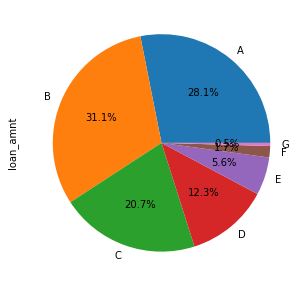

In [76]:
df.groupby(by='grade').count().plot(kind='pie', y='loan_amnt',figsize=(5,5),autopct='%1.1f%%',legend=False);

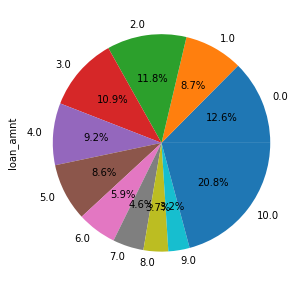

In [77]:
df.groupby(by='emp_length').count().plot(kind='pie', y='loan_amnt',figsize=(5,5),autopct='%1.1f%%',legend=False);

### Conclusions
1. More than 3/4th of lendees went for 36 months term
2. More than 3/4th of lendees are graded C or above

## Baysian Analysis

For a given $factor_i$, which could be any of the unorder categories, we need to note that

### $P(Fail|factor_i) = \frac{P(factor_i|Fail)\times P(Fail)}{P(factor_i|Fail)\times P(Fail)+P(factor_i|Success)\times P(Success)}$

where Fail means Charge Off and Success means Fully Paid.

Assuming the sampling as random and representative of the actual distibutions, we can do the following:

In [78]:
Pfail = len(df[df.loan_status=='Charged Off'])/len(df)
Psuccess = 1- Pfail
print('P_fail=',Pfail,'\nP_success=',Psuccess)

P_fail= 0.09922880879091782 
P_success= 0.9007711912090822


In [79]:
def calcPfails(df,factor_types):
    P = {}
    for factor_type in factor_types:
        #print('\n',factor_type)
        factors = list(df[factor_type].unique())
        P[factor_type] = {}
        for factor in factors:
            PfactorFail = len(df[(df[factor_type]==factor) & (df.loan_status=='Charged Off')])/len(df[df.loan_status=='Charged Off'])
            PfactorSuccess = len(df[(df[factor_type]==factor) & (df.loan_status=='Fully Paid')])/len(df[df.loan_status=='Fully Paid'])
            PfailFactor = PfactorFail*Pfail/(PfactorFail*Pfail+PfactorSuccess*Psuccess)
            P[factor_type][factor] = PfailFactor
            #print('P(Fail|',factor,') = ',PfailFactor)
    return P       

In [80]:
def plotProbFails(P,factor_type):
    
    myKeys = list(P[factor_type].keys())
    myKeys.sort()
    P[factor_type] = {i: P[factor_type][i] for i in myKeys}
    plt.figure(figsize=(15,5))
    plt.bar( P[factor_type].keys(),P[factor_type].values())
    plt.xticks(rotation=90)
    plt.ylabel('probability of failure')
    plt.xlabel(factor_type)
    plt.title('P(Failure|'+factor_type+')')
    plt.grid()
    plt.show()

In [81]:
factor_types_unord =  ['home_ownership','purpose','addr_state','verification_status']

In [82]:
P_unord = calcPfails(df,factor_types_unord) 

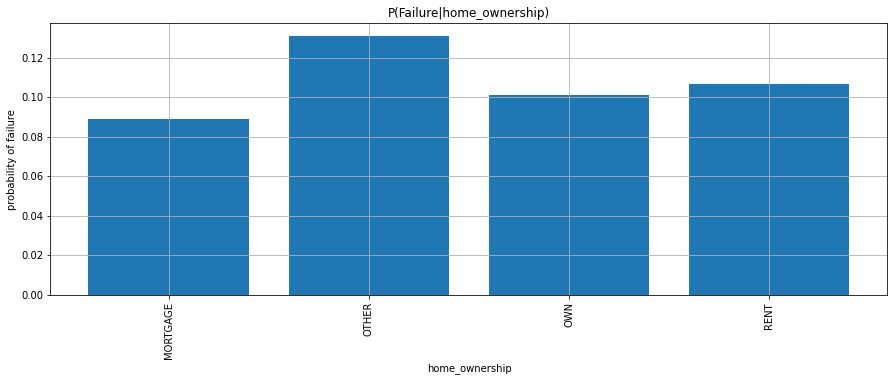

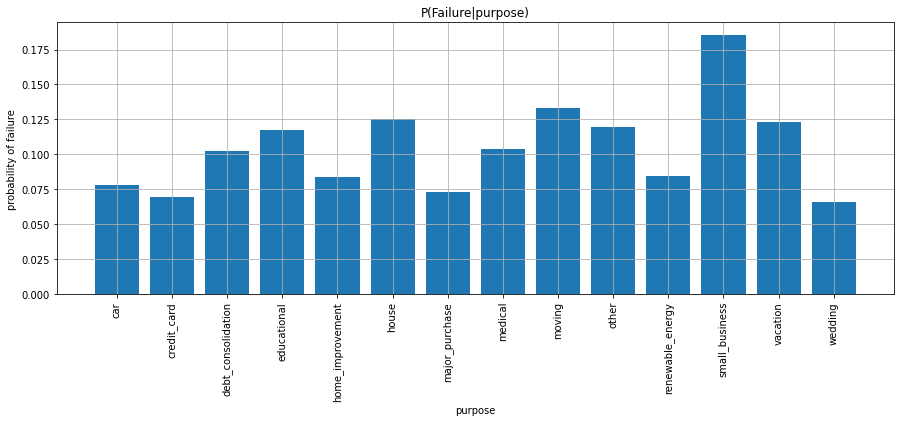

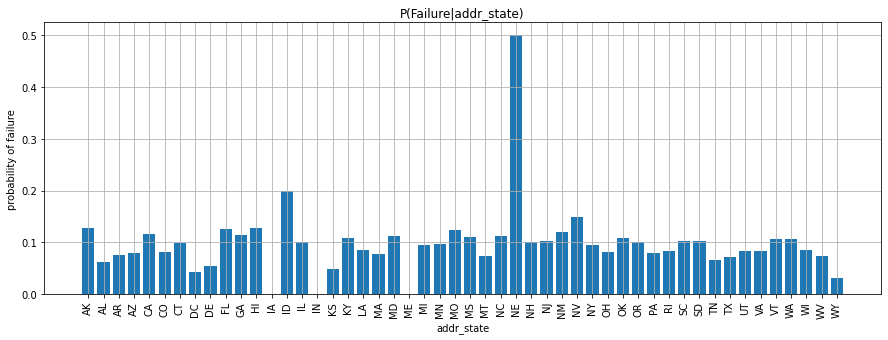

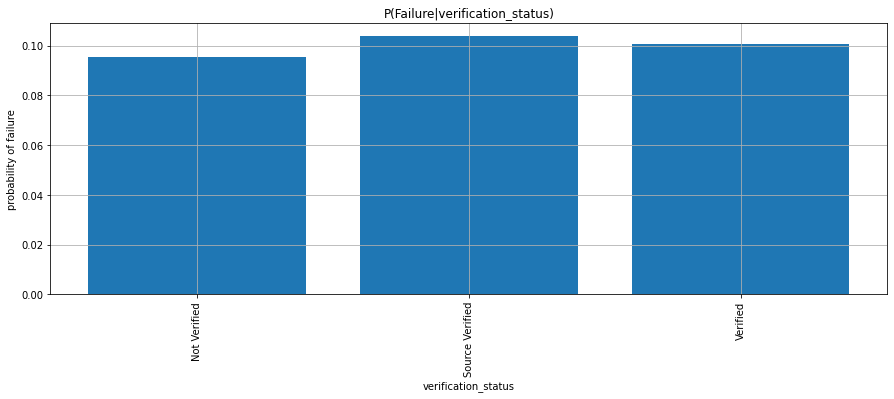

In [83]:
for factor_type in factor_types_unord:
    plotProbFails(P_unord,factor_type)

### Conclusions:
1. OTHER type of home ownership is the riskiest albiet by a small margin
2. Small businesses are the riskiest to lend to
3. State NE has an exceptionally high probability of failure, closing to 50%. Action must be taken recover loans here or limit further lendings in this zone.
4. The verification status, surprisingly enough, seem to have little impact on the failure probability
5. We shall hence consider home_ownership, purpose and addr_state as the effecting factors here

## Ordered Categorical Data
1. term
2. grade
3. sub_grade
4. emp_length
5. verification_status

In [84]:
factor_types_ord = ['term','grade','sub_grade','emp_length','pub_rec','inq_last_6mths']

In [85]:
P_ord = calcPfails(df,factor_types_ord) 

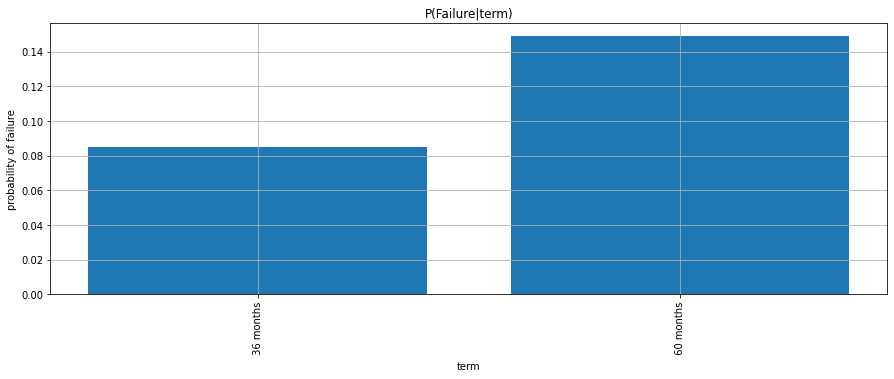

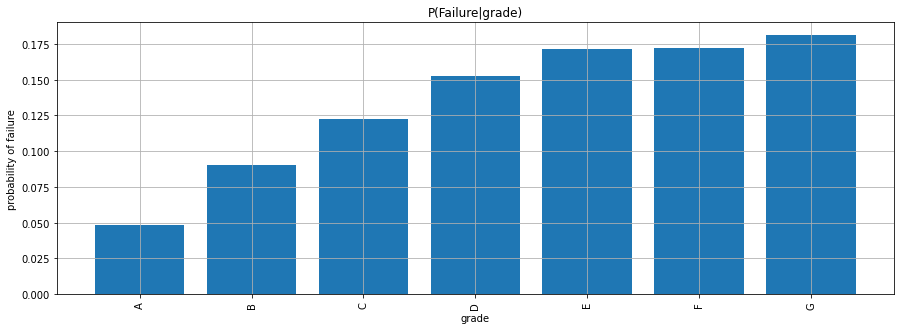

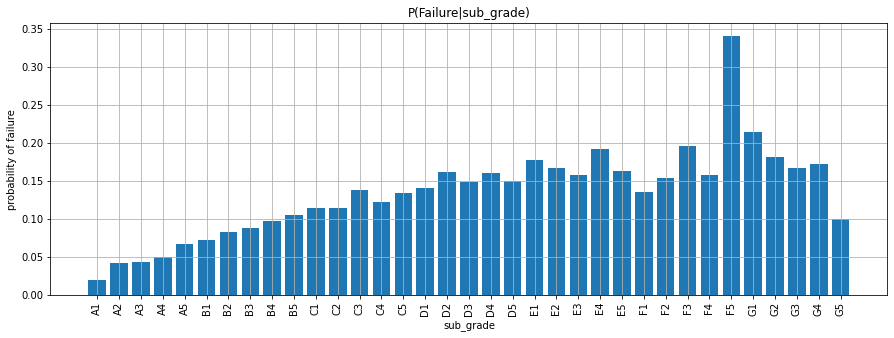

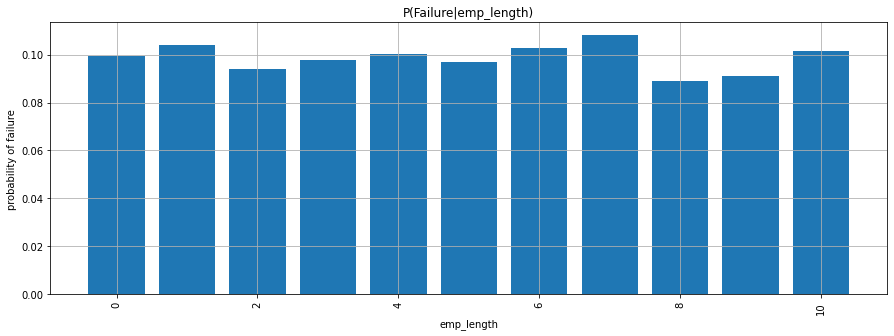

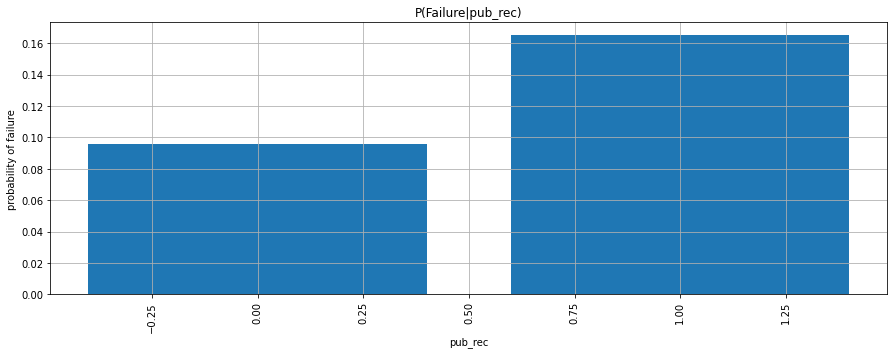

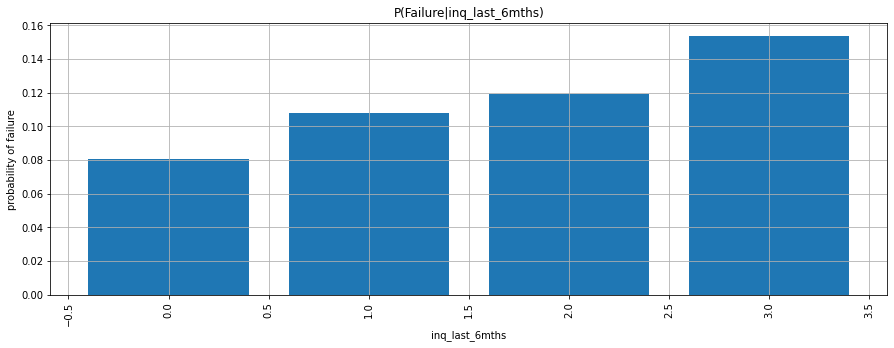

In [86]:
for factor_type in factor_types_ord:
    plotProbFails(P_ord,factor_type)

### Conclusions

1. employement length, surprisingly enough, seems to have little impact on the failure probability
2. 60 month terms are significantly much riskier than 36 month terms
3. The probabilty of defaulting seems to increase down the grades, A being the safest and G being the riskiest
4. Although the loan grading technique seems to work reasonably well, the technique to sub-grade seems to be faulty, especially with the strong misbehaviors presented in the sub-gradings of E, G and especially F (F5 is disproportionately higher than any G)
5. probability to default seems to increase with derogatory public records
6. In general, chances of defaulting seem to increase with inquiries in last 6 months
5. We shall hence consider grade, term, pub_rec and inq_last_6mths as the effecting factors here

## Numerical Data
### Numerical
1. loan_amnt
2. funded_amnt
3. funded_amnt_inv
4. int_rate
5. installment
6. annual_inc
7. dti
9. open_acc
11. revol_util

Note that
### $P(Fail|factor_i) = \frac{P(factor_i|Fail)\times P(Fail)}{P(factor_i|Fail)\times P(Fail)+P(factor_i|Success)\times P(Success)}$

In [87]:
def plotFgivenFactor(factor,df = df):
    df2 = df.copy()
    df2 = df2[[factor,'loan_status']]
    df2.loc[df2.loan_status == 'Charged Off', 'weight'] = Pfail/df2[df2.loan_status=='Charged Off'][factor].sum()
    df2.loc[df2.loan_status == 'Fully Paid', 'weight'] = Psuccess/df2[df2.loan_status=='Fully Paid'][factor].sum()

    plt.figure(figsize=(15,5))
    sns.kdeplot(data = df2,x=factor,weights='weight',hue = 'loan_status',multiple='fill')
    plt.axvline(x = df2[factor].min(), color = 'b')
    plt.axvline(x = df2[factor].max(), color = 'r')
    plt.title('P(Failure|'+factor+')')

In [88]:
def plotKDE(factor):
    plt.figure(figsize=(15,5))
    plt.title("Density of "+factor)
    sns.kdeplot(data=df[df.loan_status=='Charged Off'],x = factor,label='Charged Off')
    sns.kdeplot(data=df[df.loan_status=='Fully Paid'],x = factor,label='Fully Paid')
    plt.legend()

In [89]:
factor_type_num =['loan_amnt'
,'funded_amnt'
,'funded_amnt_inv'
,'int_rate'
,'installment'
,'annual_inc'
,'dti'
,'open_acc'
,'revol_util']

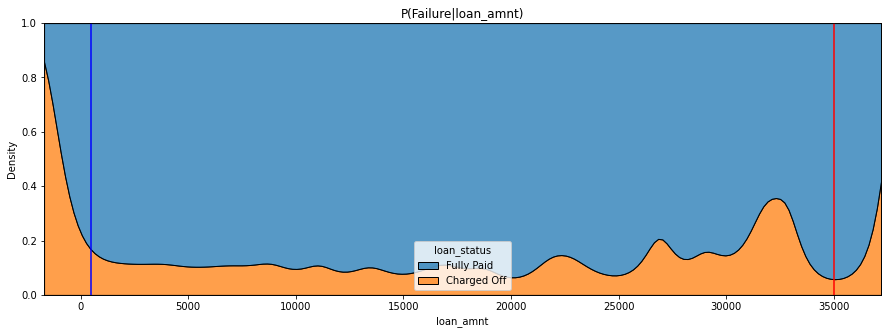

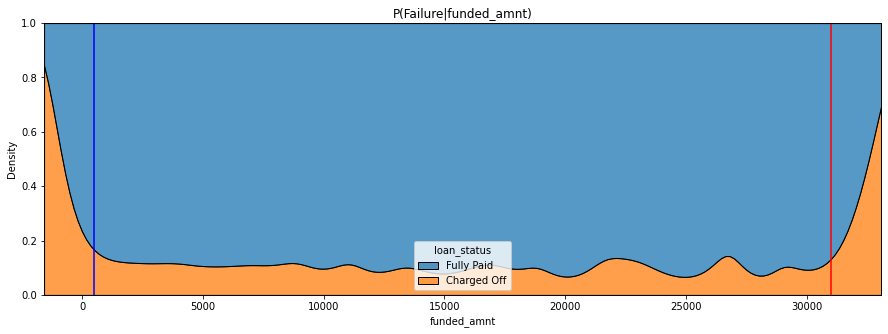

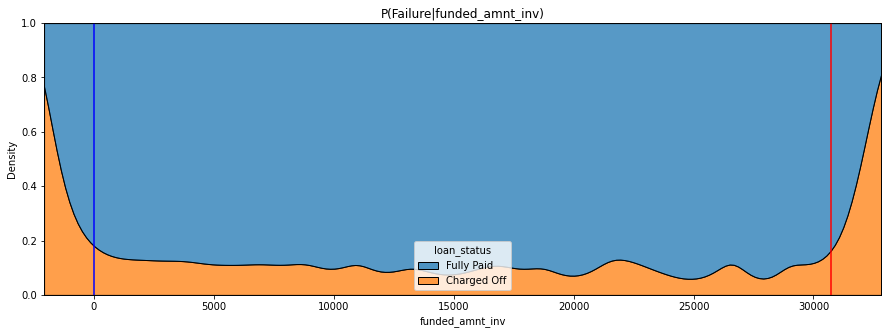

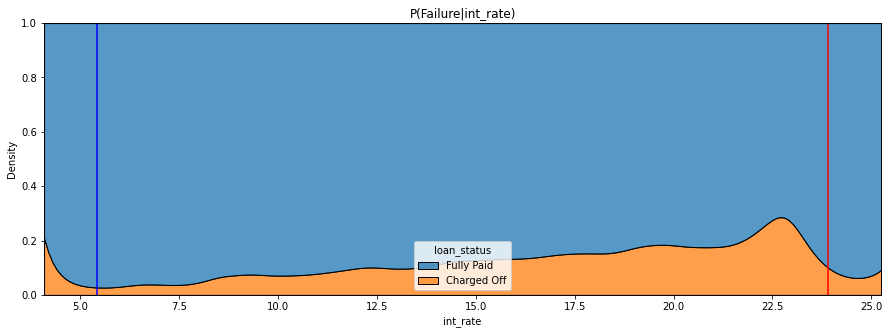

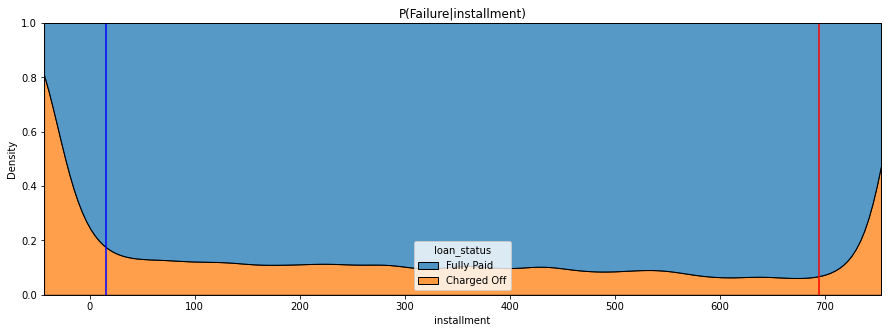

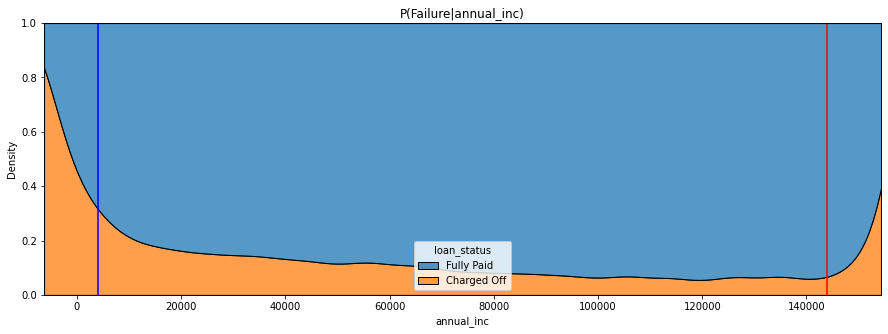

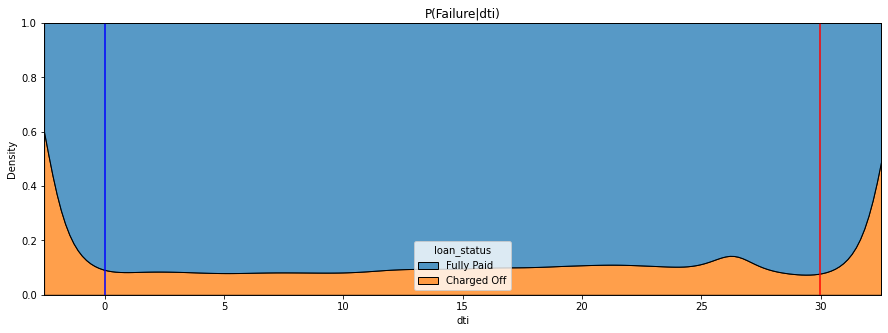

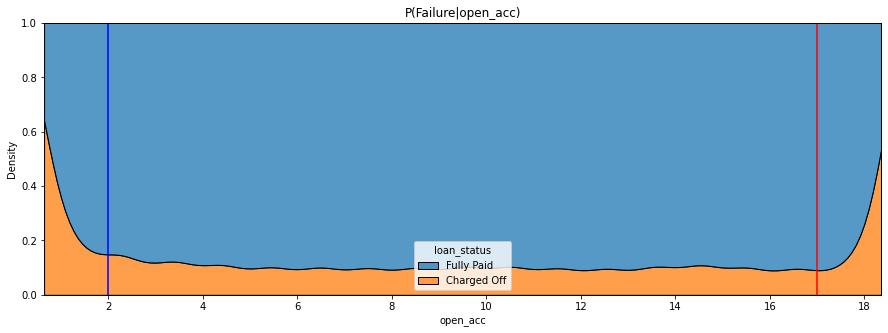

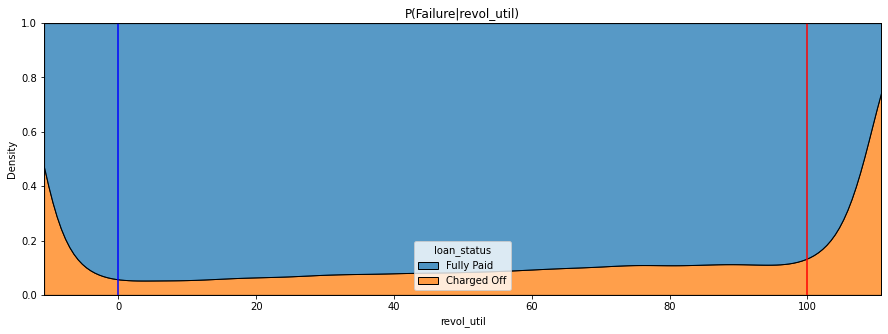

In [90]:
for factor_type in factor_type_num:
    plotFgivenFactor(factor_type)


#### Note: 
1. The orange lines in the above plots approxmately represent the PDF of P(Failure|factor)
2. We must only check the distribution between the blue and red lines to draw conclusions since they represent the min and max values. 
3. The offshots on the boundaries around limits are due to extrapolation errors

### Conclusions
1. The probability of defaulting seems to increase with int_rate
2. The probability of defaulting seems to decrease with annual_inc

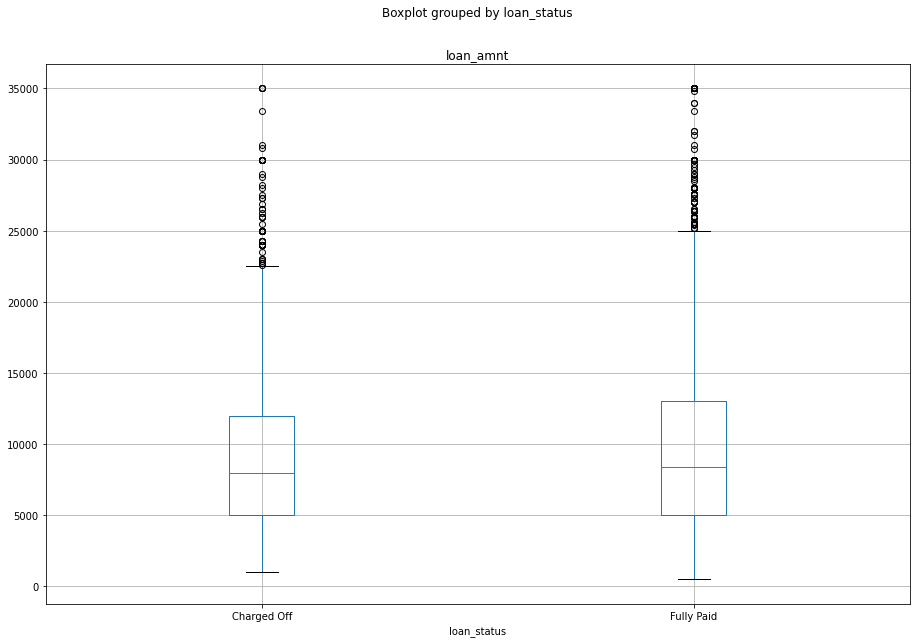

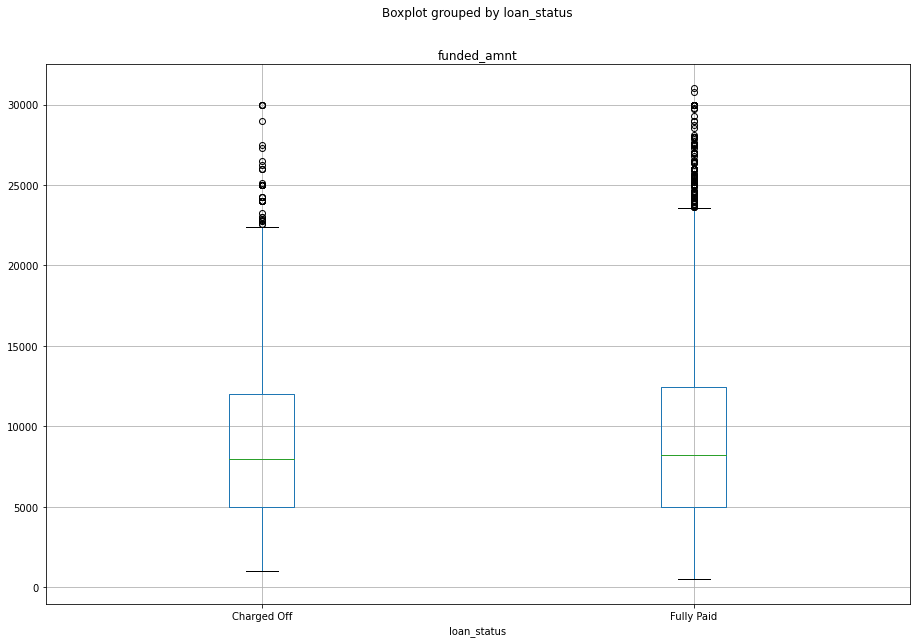

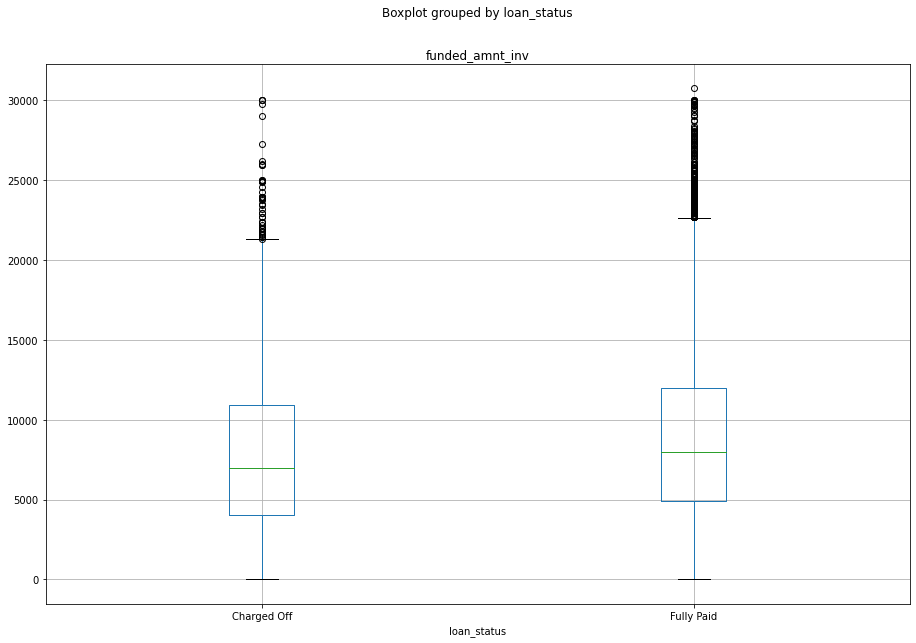

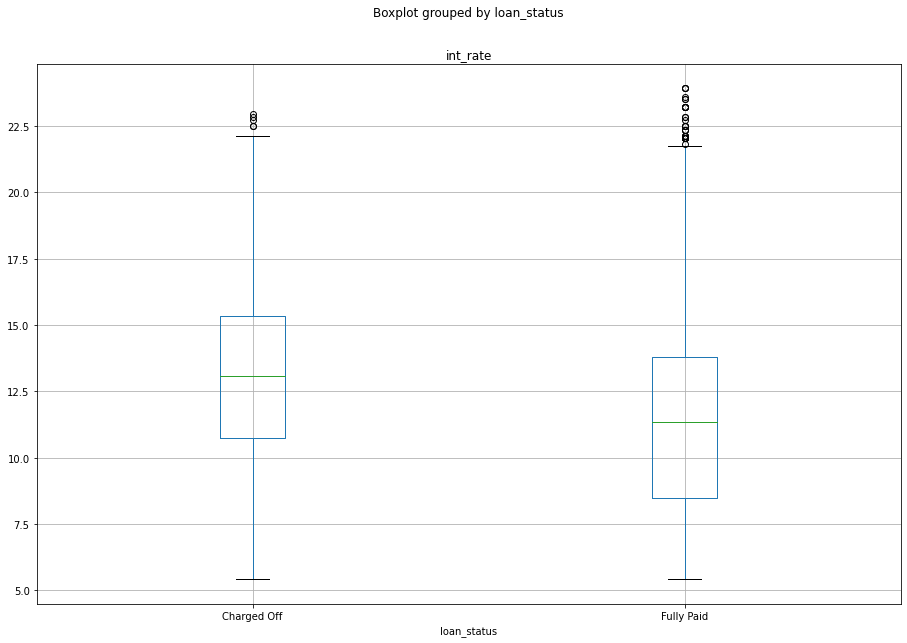

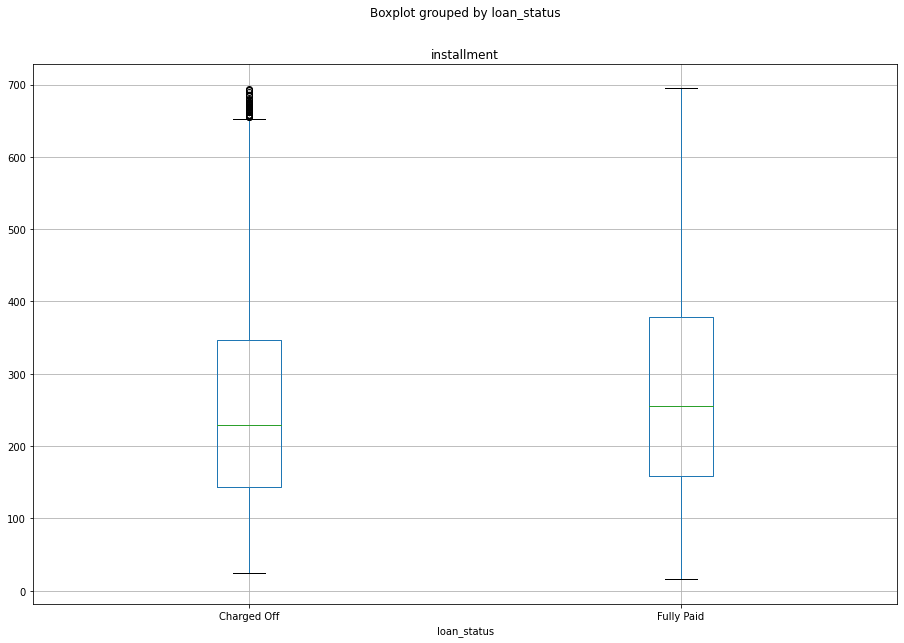

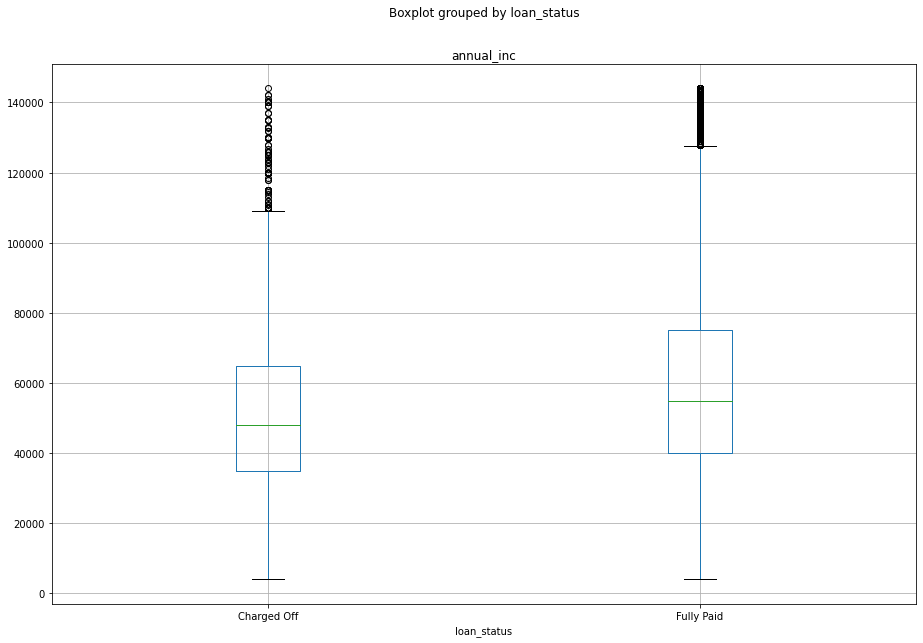

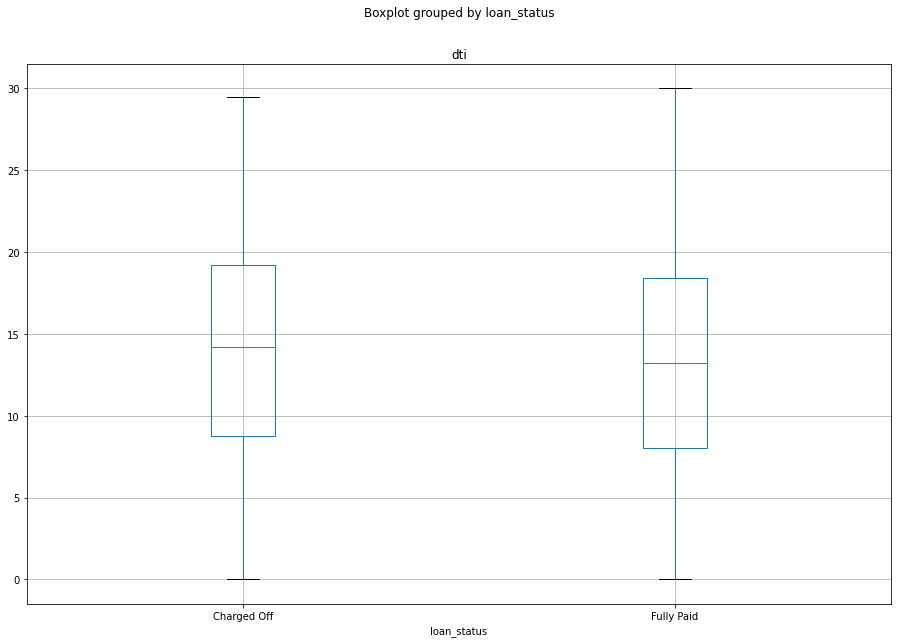

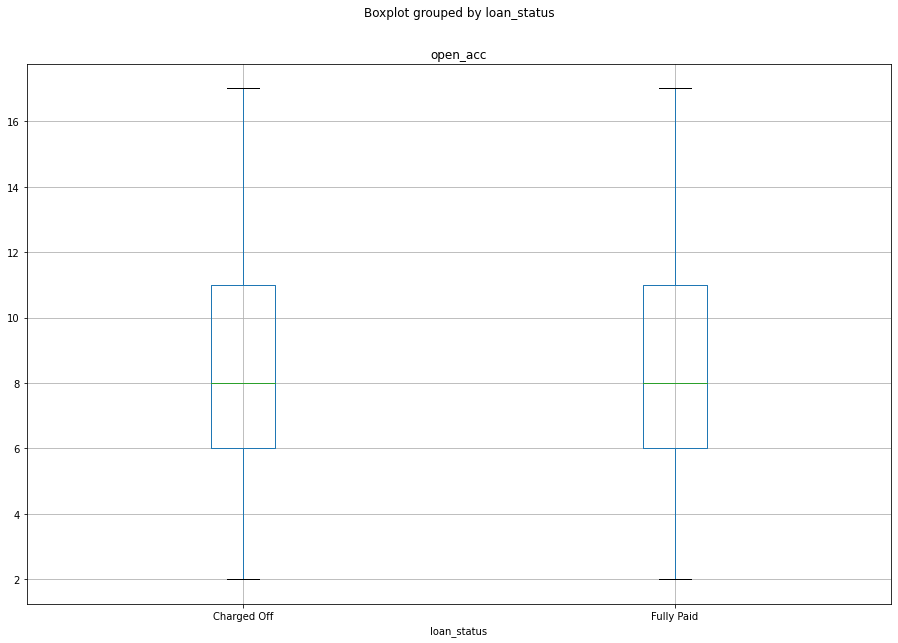

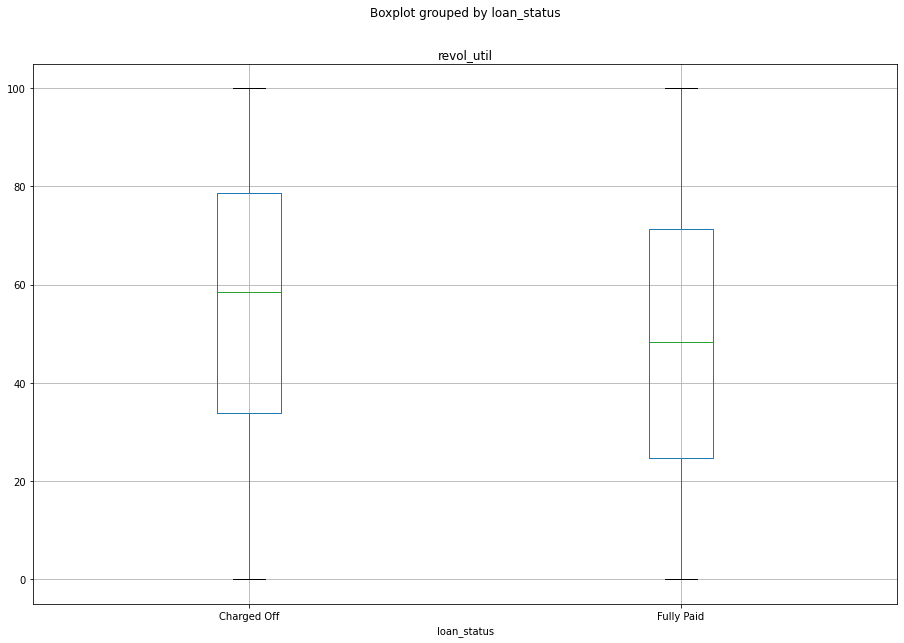

In [91]:
for factor_type in factor_type_num:
    df.boxplot(column= factor_type,by='loan_status',figsize=(15,10),)

### Conclusions
1. loan_amt shows up to have some impact on the default prbability: cases of fully paid are distribute around amounts greater than those in case of defaulting.
2. The probability of defaulting seems to increase with revol_util, and int_rate
4. The probability of defaulting seems to decrease with annual_inc

# BIVARIATE DATA ANALYSIS
Till now we have observed following to be of most impact on loan_status:

Unordered
1. home_ownership
2. purpose
3. addr_state


Ordered
1. pub_rec
5. inq_last_6mths
4. term
5. grade

Numeric
1. int_rate
7. revol_util
9. annual_inc
12. loan_amnt
2. funded_amnt
3. funded_amnt_inv

We shall now look at the combined impacts of these factors on loan_status

In [92]:
df_new = df[['home_ownership','purpose','addr_state',
            'pub_rec','inq_last_6mths','term','grade',
            'int_rate','revol_util','annual_inc','loan_amnt','funded_amnt','funded_amnt_inv','loan_status']].copy()

In [93]:
df_new['default'] = df_new.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)

## Categorical Data
Unordered
1. home_ownership
2. purpose
3. addr_state

Ordered
1. pub_rec
5. inq_last_6mths
4. term
5. grade

In [94]:
def categ_heatmap(index,columns,df_new=df_new):
    df_heatmap = df_new.pivot_table(values='default',index=index,columns=columns,aggfunc=np.mean)
    plt.figure(figsize=(20,5))
    sns.heatmap(df_heatmap,annot=True,cmap='Greens')
    plt.show()

In [95]:
def categ_heatmap_count(index,columns,df_new=df_new):
    df_heatmap = df_new.pivot_table(values='default',index=index,columns=columns,aggfunc=len)
    plt.figure(figsize=(20,5))
    sns.heatmap(df_heatmap,annot=True,cmap='Greens')
    plt.show()

### home ownership vs grade

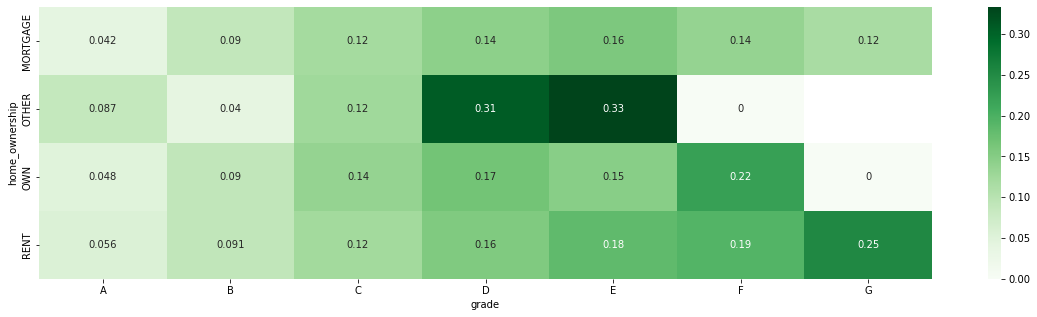

In [96]:
categ_heatmap('home_ownership','grade')

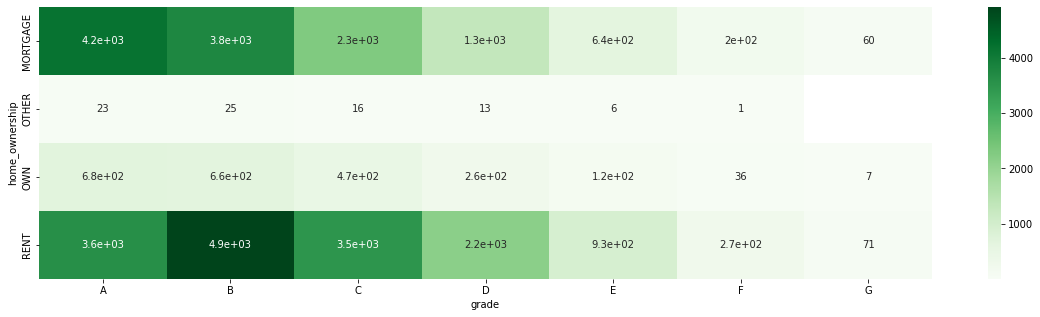

In [97]:
categ_heatmap_count('home_ownership','grade')

### Conclusion
No specific relation between home_ownership and grade

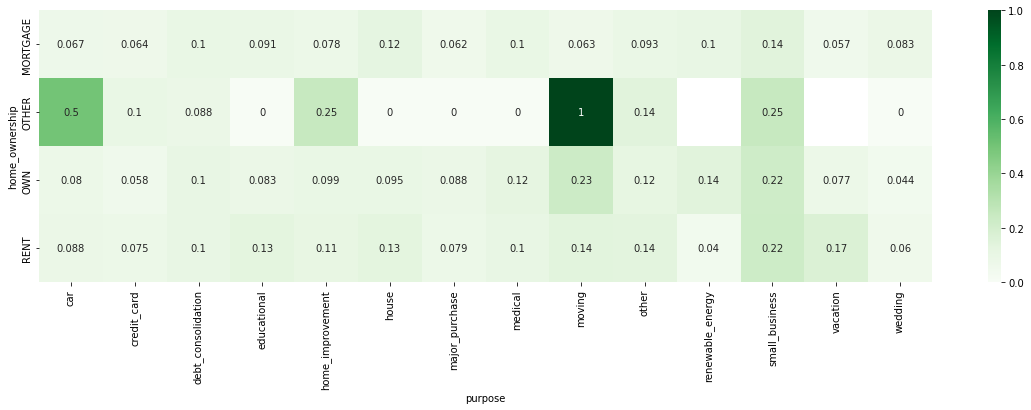

In [98]:
categ_heatmap('home_ownership','purpose')

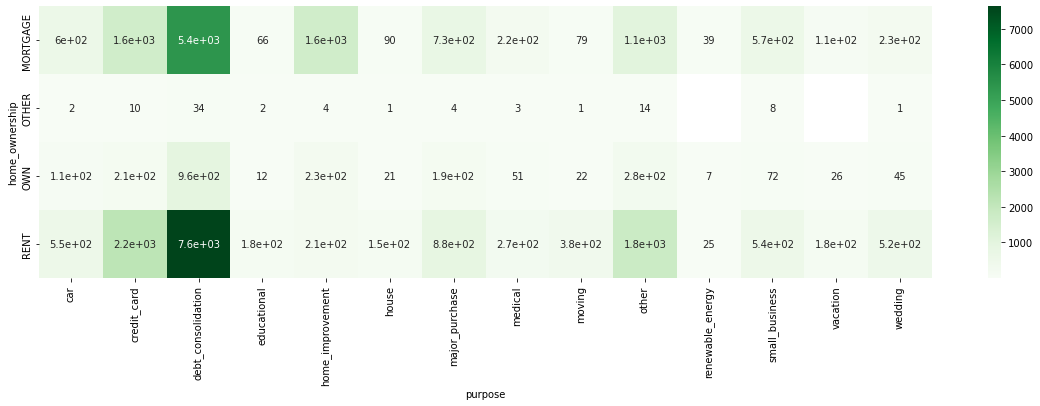

In [99]:
categ_heatmap_count('home_ownership','purpose')

### Conclusion
No specific relation between home_ownership and purpose

### pub_rec vs grade

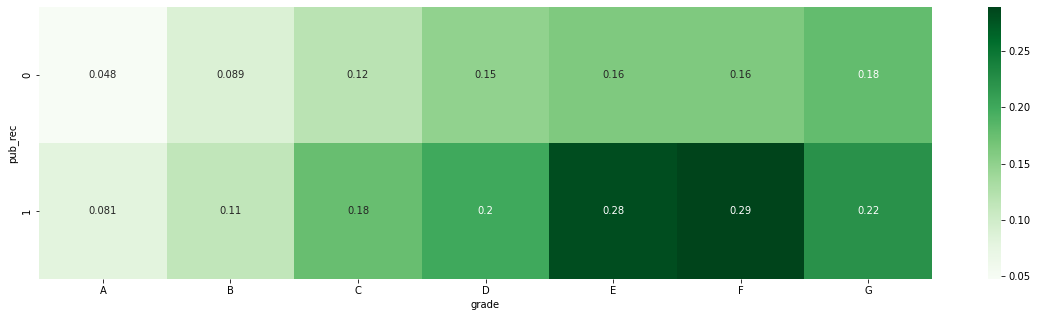

In [100]:
categ_heatmap('pub_rec','grade')

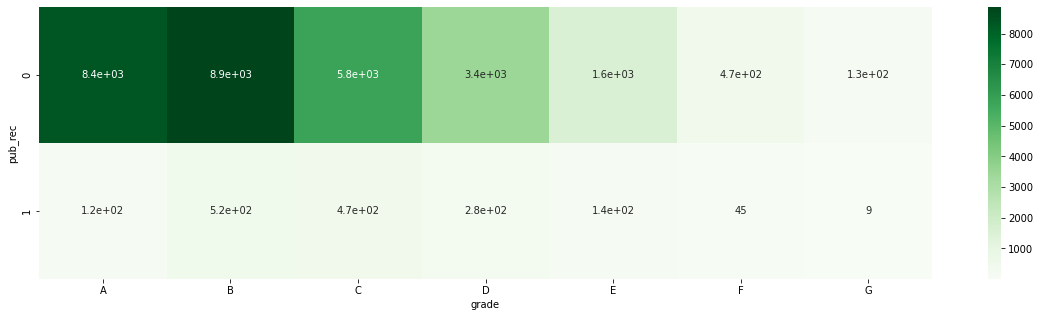

In [101]:
categ_heatmap_count('pub_rec','grade')

### Conclusion
Lesser the pub_rec more the grade


### 'inq_last_6mths' vs pub_rec'

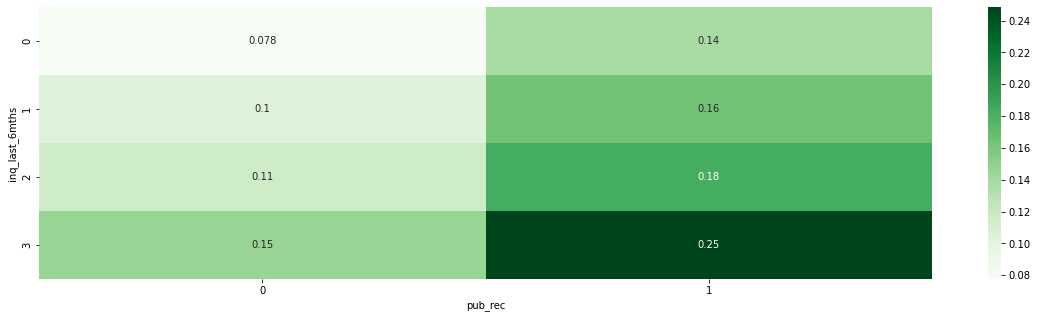

In [102]:
categ_heatmap('inq_last_6mths','pub_rec')

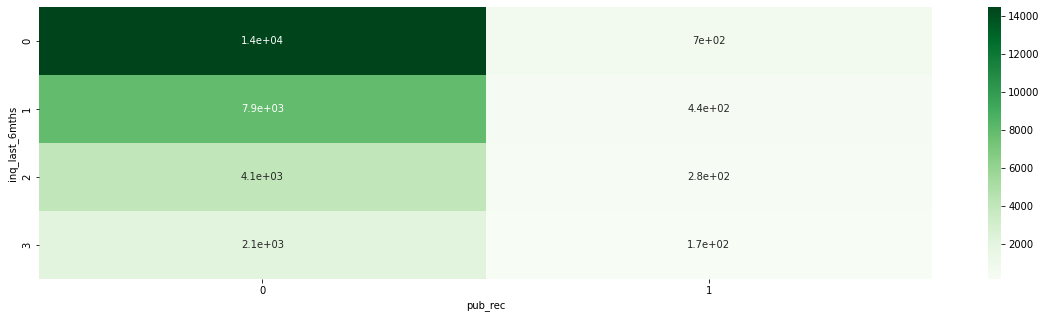

In [103]:
## 'inq_last_6mths' vs pub_rec'
categ_heatmap_count('inq_last_6mths','pub_rec')

### Conclusion
lesser inquiries lesser pub_rec

### 'inq_last_6mths' vs grade

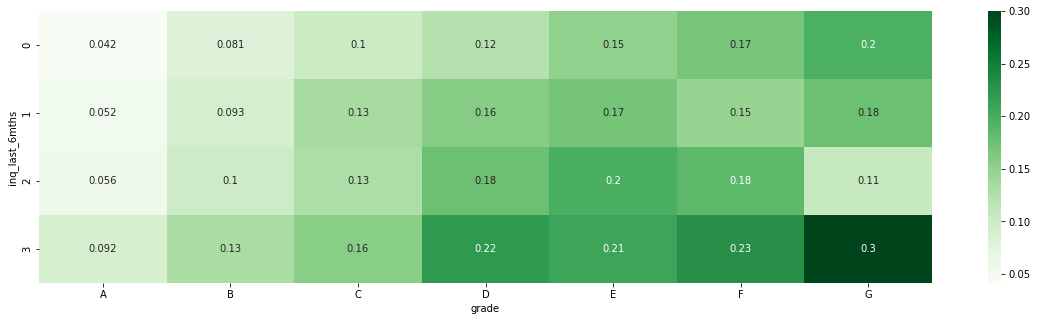

In [104]:
categ_heatmap('inq_last_6mths','grade')

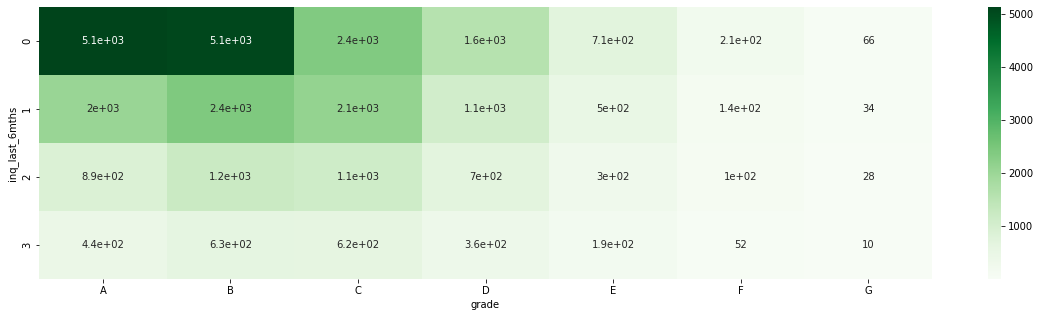

In [105]:
categ_heatmap_count('inq_last_6mths','grade')

### Conclusion
Lesser the inqueries, better the grade

### 'home_ownership' vs 'addr_state'

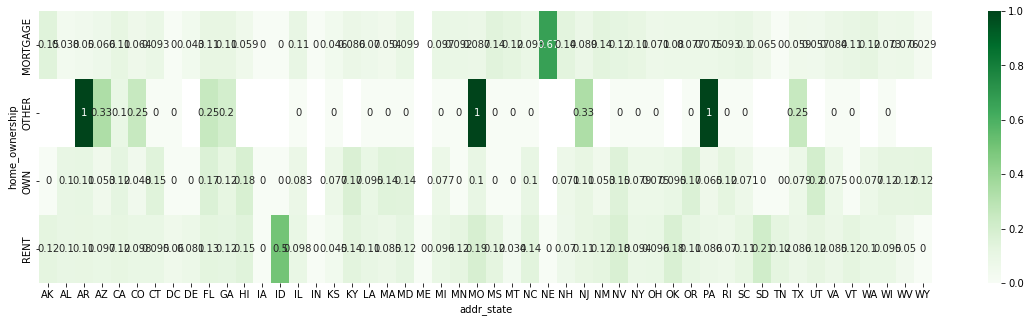

In [106]:
categ_heatmap('home_ownership','addr_state')

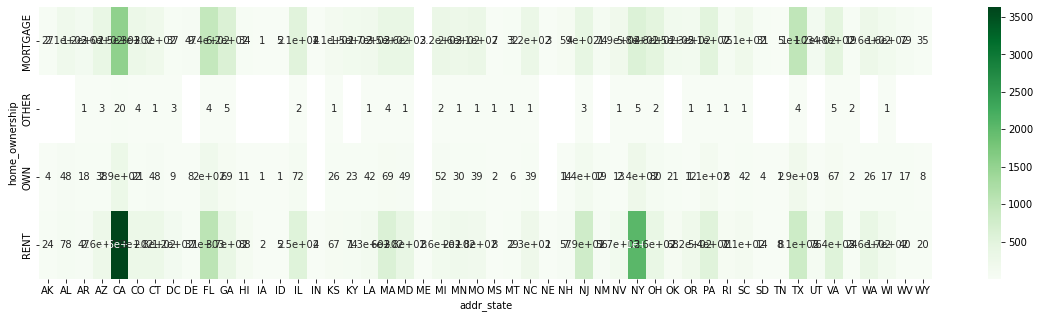

In [107]:
categ_heatmap_count('home_ownership','addr_state')

### Conclusions:
In CA has almost all lendees live in rented houses

## Numeric vs Categorical
Unordered
1. home_ownership
2. purpose
3. addr_state

Ordered
1. pub_rec
5. inq_last_6mths
4. term
5. grade

Numeric
1. int_rate
7. revol_util
9. annual_inc
12. loan_amnt
2. funded_amnt
3. funded_amnt_inv

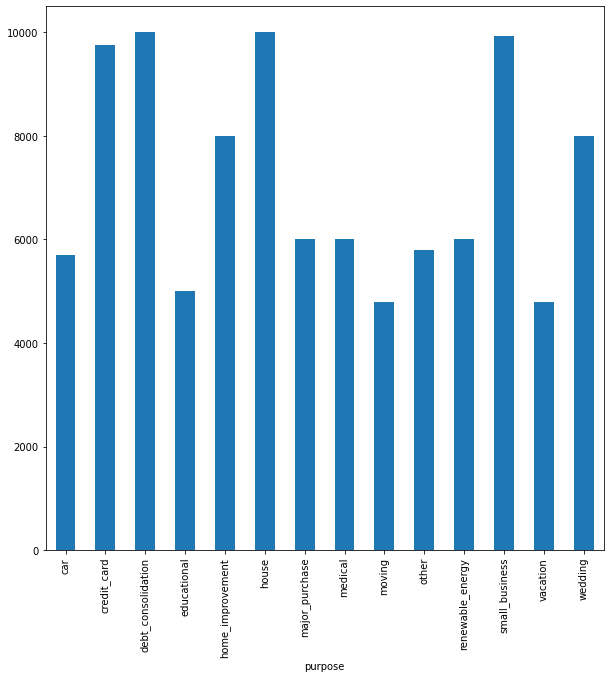

In [108]:
df_new.groupby(by='purpose').median().plot(kind='bar', y='loan_amnt',figsize=(10,10),legend=False);

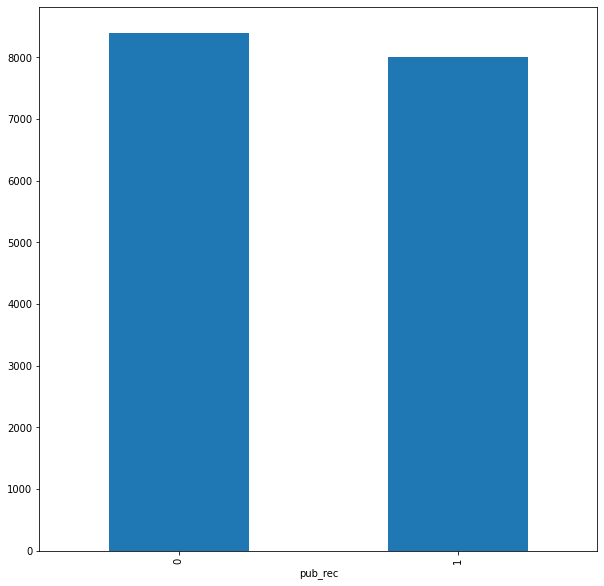

In [109]:
df_new.groupby(by='pub_rec').median().plot(kind='bar', y='loan_amnt',figsize=(10,10),legend=False);

Text(0, 0.5, 'loan_amnt')

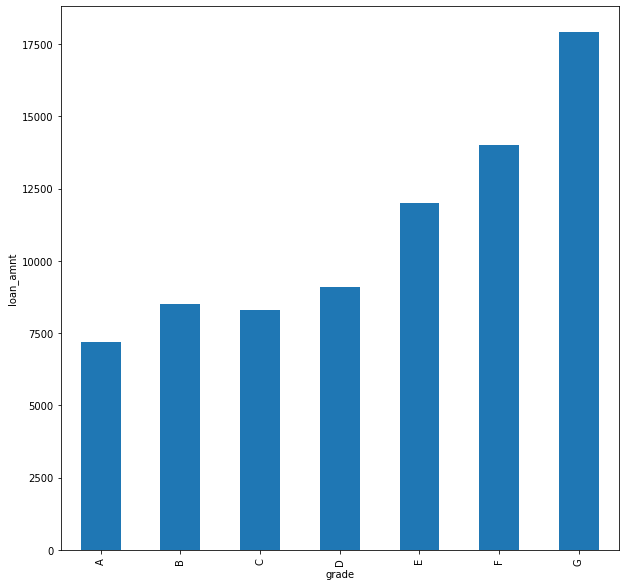

In [110]:
df_new.groupby(by='grade').median().plot(kind='bar', y='loan_amnt',figsize=(10,10),legend=False);
plt.ylabel('loan_amnt')

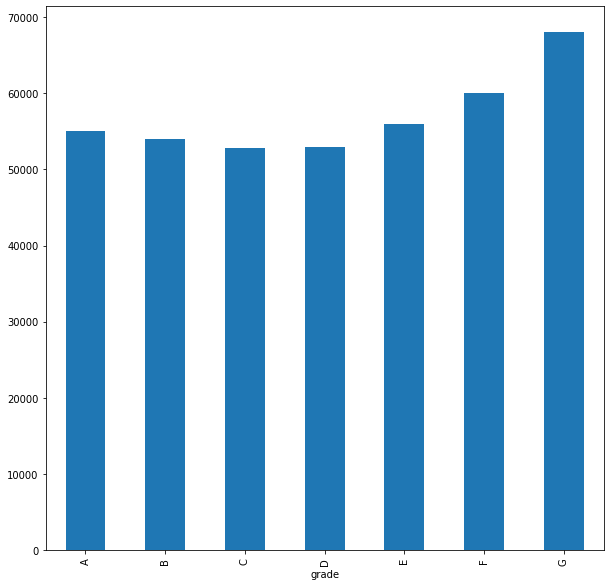

In [111]:
df_new.groupby(by='grade').median().plot(kind='bar', y='annual_inc',figsize=(10,10),legend=False);

Text(0, 0.5, 'int_rate')

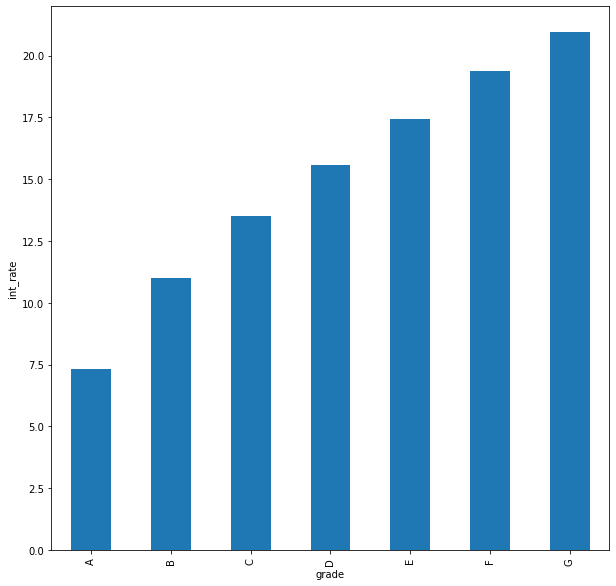

In [112]:
df_new.groupby(by='grade').mean().plot(kind='bar', y='int_rate',figsize=(10,10),legend=False);
plt.ylabel('int_rate')

### Conclusions
1. median Small business, house related and credit/consolidation loans are higher than the rest
2. median loan amount increases with decreasing grade
3. median interest rate increases with decreasing grade

## Numeric Variables

In [113]:
# better have numerical conversion of grade to find correlations with numeric columns
df_new['grade_num'] = df_new.grade.apply(lambda x:string.ascii_uppercase.index(x)+1)

<AxesSubplot:>

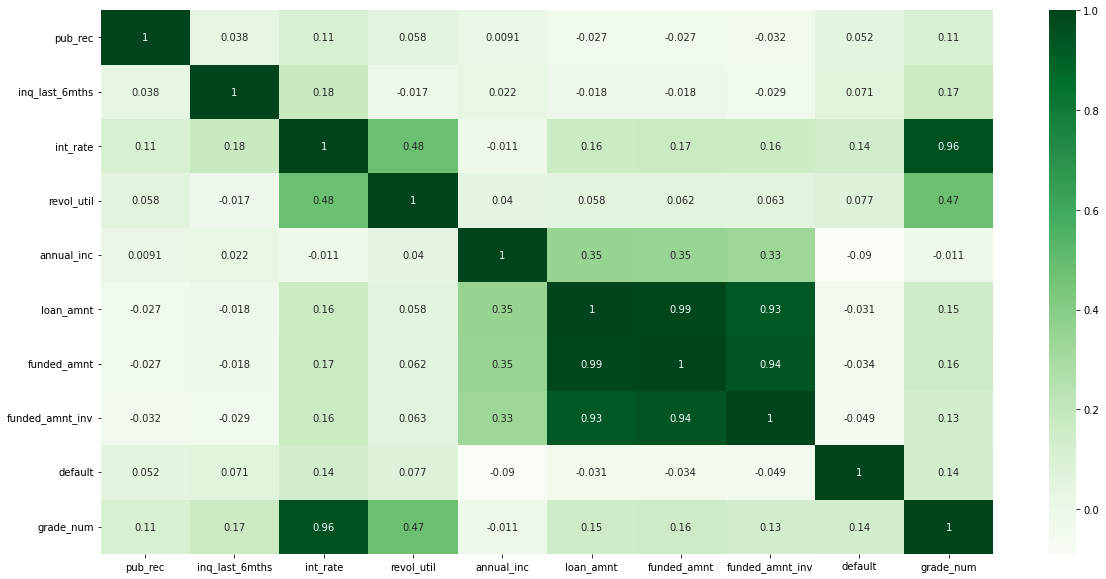

In [114]:
corr =df_new.corr(method='spearman')
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='Greens',annot=True)

### Conclusion
1. Higher the grade (A is highest), lower the interest rate
2. Higher the interest rate, higher the revolving utility
3. annual_income is mildly postively correlated with loan/funded amounts

# TIME SERIES ANALYSIS

In [115]:
df_time = df[['home_ownership','purpose','addr_state',
            'pub_rec','inq_last_6mths','term','grade',
            'int_rate','revol_util','annual_inc','loan_amnt',
              'funded_amnt','funded_amnt_inv','loan_status',
              'issue_d']].copy()

In [116]:
df_time['default'] = df_time.loan_status.apply(lambda x: 1 if x=='Charged Off' else 0)
# better have numerical conversion of grade to find correlations with numeric columns
df_time['grade_num'] = df_time.grade.apply(lambda x:string.ascii_uppercase.index(x)+1)

In [117]:
df_time['issue_month']=df.issue_d.dt.month
df_time['issue_year']=df.issue_d.dt.year

In [118]:
df_time.head()

,home_ownership,purpose,addr_state,pub_rec,inq_last_6mths,term,grade,int_rate,revol_util,annual_inc,loan_amnt,funded_amnt,funded_amnt_inv,loan_status,issue_d,default,grade_num,issue_month,issue_year
0,RENT,credit_card,AZ,0,1,36 months,B,10.65,83.7,24000.0,5000,5000,4975.0,Fully Paid,2011-12-01,0,2,12,2011
2,RENT,small_business,IL,0,2,36 months,C,15.96,98.5,12252.0,2400,2400,2400.0,Fully Paid,2011-12-01,0,3,12,2011
3,RENT,other,CA,0,1,36 months,C,13.49,21.0,49200.0,10000,10000,10000.0,Fully Paid,2011-12-01,0,3,12,2011
5,RENT,wedding,AZ,0,3,36 months,A,7.90,28.3,36000.0,5000,5000,5000.0,Fully Paid,2011-12-01,0,1,12,2011
6,RENT,debt_consolidation,NC,0,1,60 months,C,15.96,85.6,47004.0,7000,7000,7000.0,Fully Paid,2011-12-01,0,3,12,2011


Text(0, 0.5, 'number of loans lent')

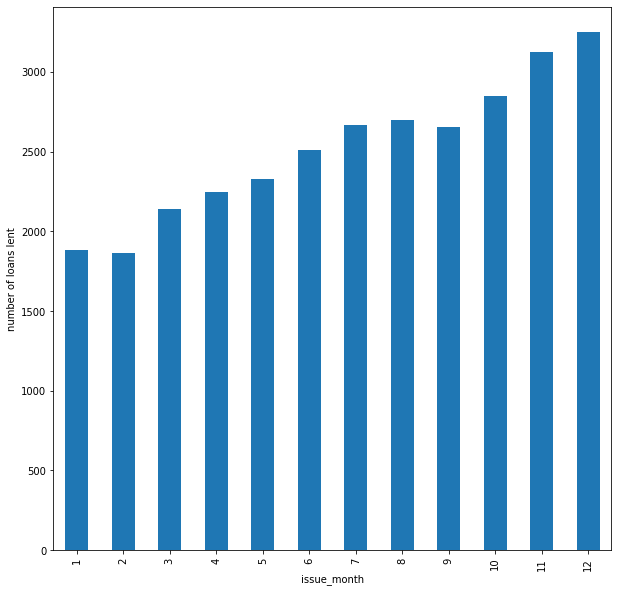

In [119]:
df_time.groupby(by='issue_month').count().plot(kind='bar', y='default',figsize=(10,10),legend=False);
plt.ylabel('number of loans lent')

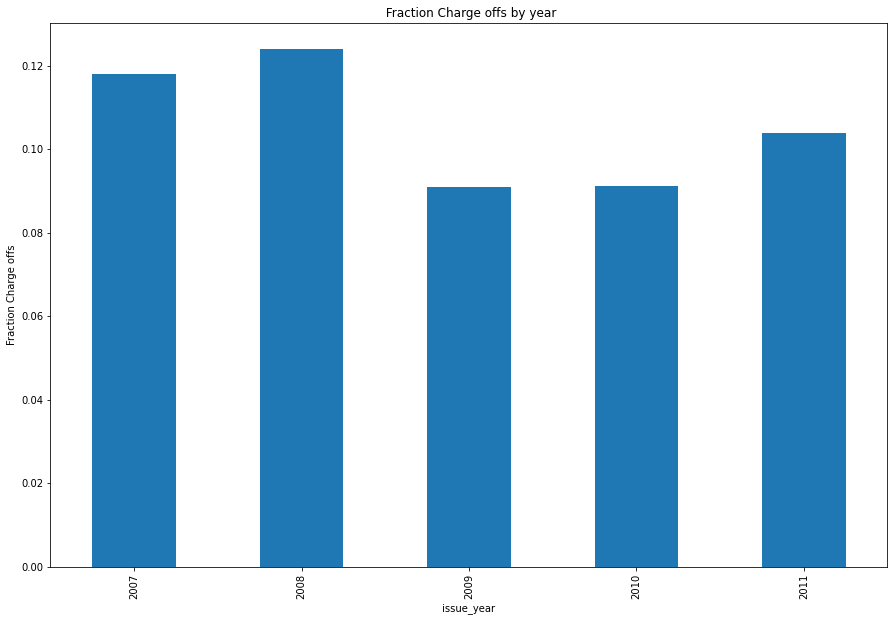

In [120]:
df_time.groupby(by='issue_year').mean().plot(kind='bar', y='default',figsize=(15,10),legend=False);
plt.ylabel('Fraction Charge offs')
plt.title(' Fraction Charge offs by year');

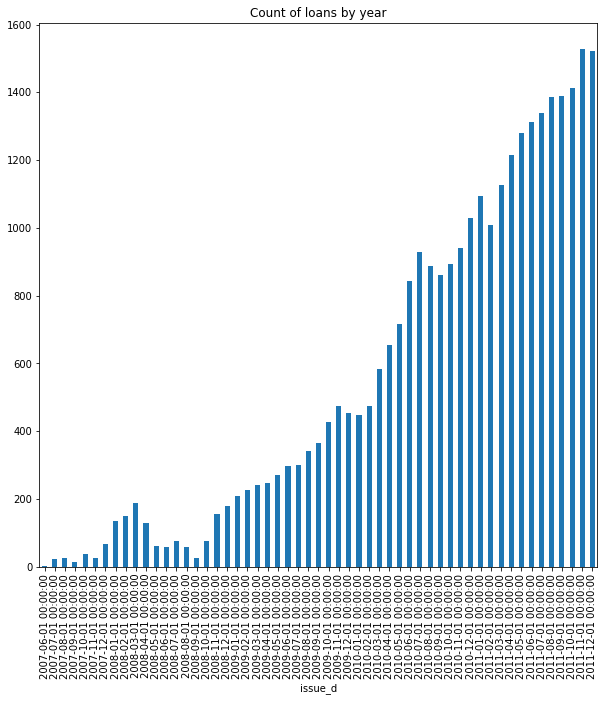

In [121]:
df_time.groupby(by='issue_d').count().plot(kind='bar', y='default',figsize=(10,10),legend=False);
plt.title('Count of loans by year');

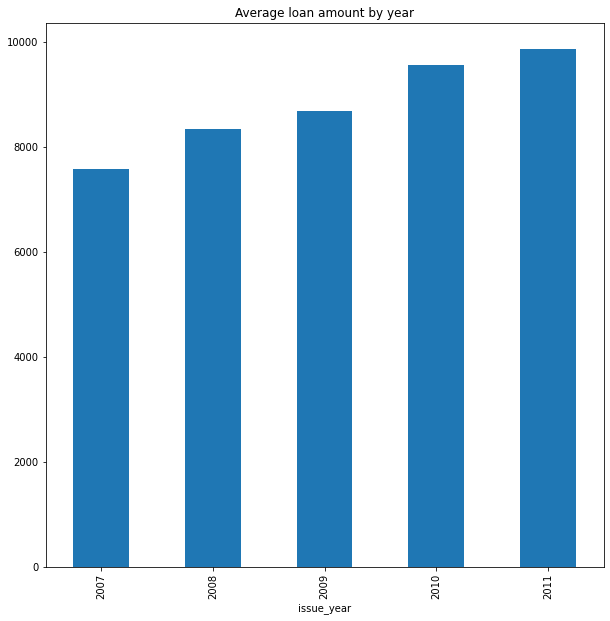

In [122]:
df_time.groupby(by='issue_year').mean().plot(kind='bar', y='loan_amnt',figsize=(10,10),legend=False);
plt.title('Average loan amount by year');

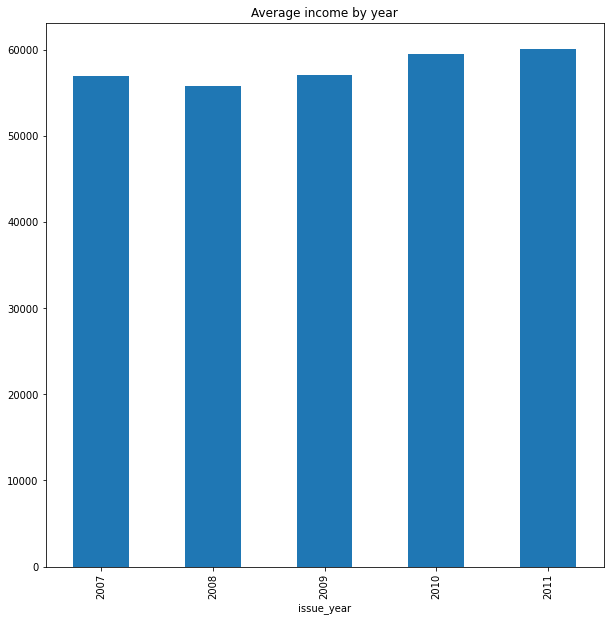

In [123]:
df_time.groupby(by='issue_year').mean().plot(kind='bar', y='annual_inc',figsize=(10,10),legend=False);
plt.title('Average income by year');

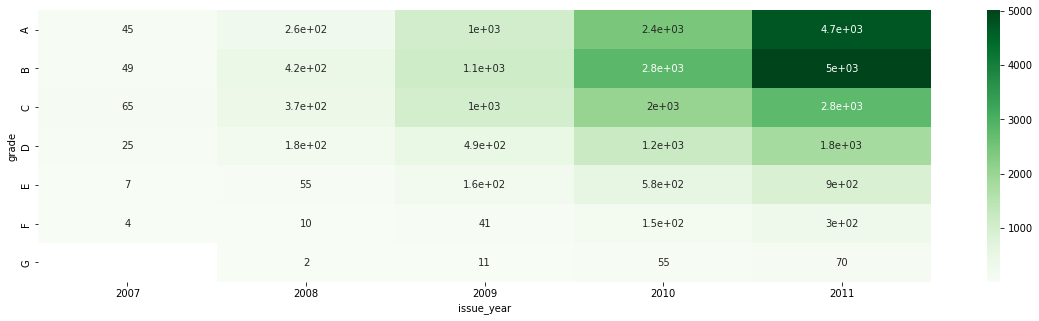

In [124]:
categ_heatmap_count('grade','issue_year',df_new=df_time)

### Conclusion
1. Number of loans issue increased month by month, almost doubling each year
2. Each year saw an increase with year average loan
3. But annual incomes didn't change much over the years

# OBSERVATIONS

## From univariate analysis
1. Most of the lendings were successful
2. Major purpose for applying for loan is debt_consolidation (almost 50%)
3. Second major purpose is for credit_card
4. Less than 1% of lendees have an education loan or renewable energy loan
4. Most income sources have not been verified by LC
5. CA has been the most active state where loans were give (about 18%)
6. About half the lendees rent and alomst another half have mortgaed their homes. 
7. People with unmortgaged homes (7.5%) are least likely to apply for a loan
1. More than 3/4th of lendees went for 36 months term
2. More than 3/4th of lendees are graded C or above

## From baysian analysis of P(Fail|factor)
1. OTHER type of home ownership is the riskiest albiet by a small margin
2. Small businesses are the riskiest to lend to
2. 60 month terms are significantly much riskier than 36 month terms
3. The probabilty of defaulting seems to increase down the grades, A being the safest and G being the riskiest
4. Although the loan grading technique seems to work reasonably well, the technique to sub-grade seems to be faulty, especially with the strong misbehaviors presented in the sub-gradings of E, G and especially F (F5 is disproportionately higher than any G)
5. probability to default seems to increase with derogatory public records
6. In general, chances of defaulting seem to increase with inquiries in last 6 months
1. loan_amt shows up to have some impact on the default prbability: cases of fully paid are distribute around amounts greater than those in case of defaulting.
2. The probability of defaulting seems to increase with revol_util, and int_rate
4. The probability of defaulting seems to decrease with annual_inc

## Bivariate analysis
1. median Small business, house related and credit/consolidation loans are higher than the rest
2. median loan amount increases with decreasing grade
3. median interest rate increases with decreasing grade
1. Higher the grade (A is highest), lower the interest rate
2. Higher the interest rate, higher the revolving utility
3. annual_income is mildly postively correlated with loan/funded amounts

## Time series analysis
1. Number of loans issue increased month by month, almost doubling each year
2. Each year saw an increase with year average loan
3. But annual incomes didn't change much over the years